[toi list](https://exofop.ipac.caltech.edu/tess/view_toi.php)

In [1]:
%matplotlib inline
import pandas as pd
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from astropy.io import fits
import numpy as np
from glob import glob
import os

In [20]:

curl_paths = glob('curls/*')

urls = []

for path in curl_paths: 
    curls = open(path).read().splitlines()[1:]
    
    for curl in curls: 
        urls.append(curl.split(' ')[-1])

In [5]:
import pandas as pd

tois = pd.read_csv('/Users/bmmorris/Downloads/exofop_tess_tois.csv', skiprows=1)

In [14]:
conditions = (tois['TESS mag'] < 9) & (tois['Stellar Teff (K)'] < 6000) )

In [16]:
tois.columns

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master priority', 'SG1A priority',
       'SG1B priority', 'SG2 priority', 'SG3 priority', 'SG4 priority',
       'SG5 priority', 'ACWG priority', 'TESS Disposition',
       'TFOPWG Disposition', 'TESS mag', 'TESS mag error', '# PCs', 'Source',
       'RA (degrees)', 'Dec (degrees)', 'PM RA (mas/yr)', 'PM RA error',
       'PM Dec (mas/yr)', 'PM Dec error', 'Epoch (BJD)', 'Epoch error',
       'Period (days)', 'Period error', 'Duration (hours)', 'Duration error',
       'Depth (mmag)', 'Depth (mmag) error', 'Depth (ppm)',
       'Depth (ppm) error', 'Planet Radius (R_Earth)', 'Planet Radius error',
       'Planet Insolation (Earth flux)', 'Planet Eq Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance error', 'Stellar Teff (K)',
       'Stellar Teff error', 'Stellar log(g) (cm/s2)', 'Stellar log(g) error',
       'Stellar Radius (R_Sun)', 'Stellar Radius error', 'Sectors', 'Comments',
       'Date Created', 'Date Modified'

294090620
130415266
412961700
293853437
286132427


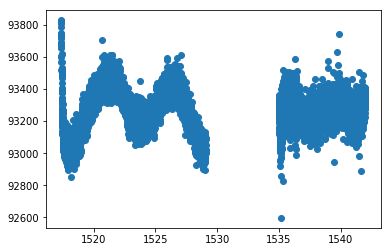

133334108


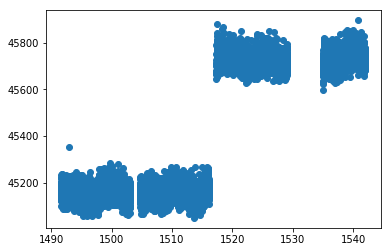

72090501
22221375


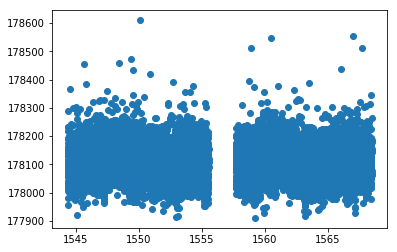

55092869


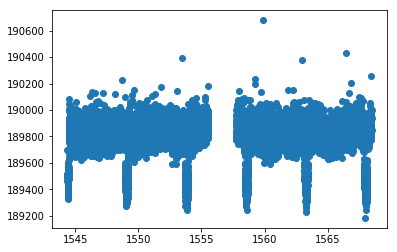

335499997


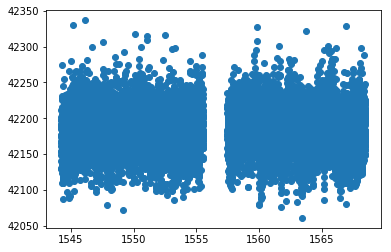

219345200


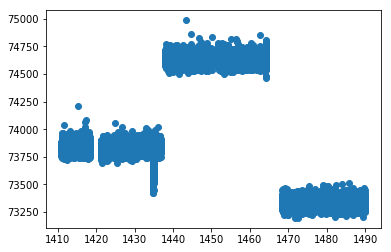

34068865


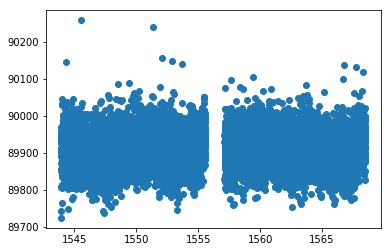

106402532


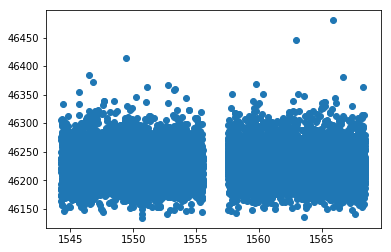

359271092


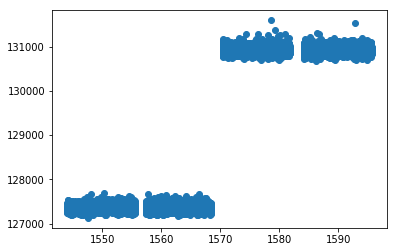

374095457


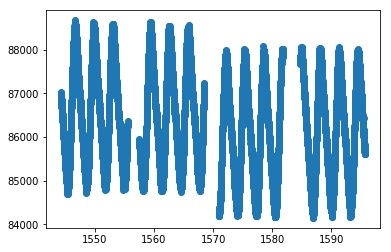

460984940


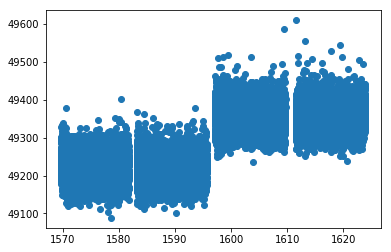

349829627


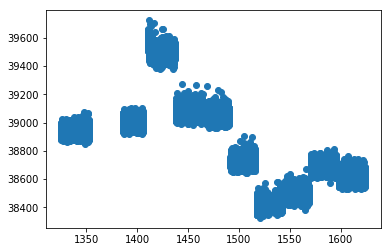

167303382


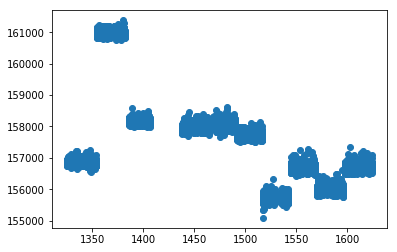

307610438


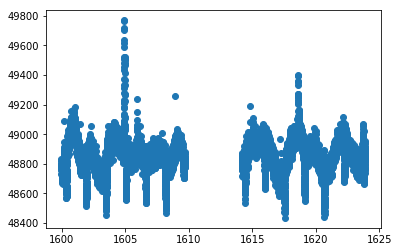

440887364


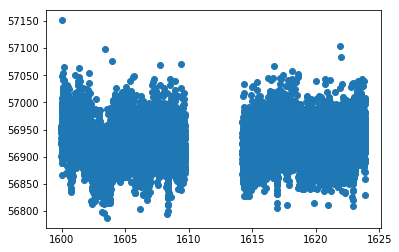

In [23]:
for ticid in tois[conditions]['TIC ID'].values:
    
    if not os.path.exists('downloads/{0}.npy'.format(ticid)):
        download_urls = []
        for url in urls: 
            if str(ticid) in url: 
                download_urls.append(url)
        print(ticid)
        times = []
        fluxes = []
        for url in download_urls:
            path = download_file(url)
            f = fits.getdata(path)
            times.append(f['TIME'])
            fluxes.append(f['PDCSAP_FLUX'])

        if len(times) > 0:
            times = np.concatenate(times)
            fluxes = np.concatenate(fluxes)

            np.save('downloads/{0}.npy'.format(ticid), np.vstack([times, fluxes]).T)

            plt.scatter(times, fluxes)
            plt.show()